#Face Classification by Emotion


Welcome to lesson 1! For those of you who are using a Jupyter Notebook for the first time, you can learn about this useful tool in a tutorial we prepared specially for you; click `File`->`Open` now and click `00_notebook_tutorial.ipynb`. 

In this lesson we will build our first image classifier from scratch, and see if we can achieve world-class results. Let's dive in!

Every notebook starts with the following three lines; they ensure that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

possible fix for ImageCleaner bug -- install conda? currently conda is not recognized command


In [ ]:

# conda update conda
# conda install -c fastai fastai

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
ls

00_notebook_tutorial.ipynb
06_Gratitude_Up_Your_Happiness_Factor_488182127_lzf.jpg
1-smile-smile.jpg
1456450483903032.jpg
14629458465_6eae5690a3_z1.jpg
3-2-happy-person-png-clipart-thumb.png
3DA81428-2189-43E2-85334C723D882F28_source.jpg
427394C200000578-4707164-Happy_people_are_healthier_Some_65_percent_of_relevant_studies_f-m-21_1500384450707.jpg
42948-happy-young-woman-eyes-closed1.jpg
56a7e43b58c32378008b55c8-750.jpg
5b9e7d542100003100c5f33e.jpeg
635729578575874189854766385_a20759d7836367c3_happy.xxxlarge.jpg
648_perks-of-happiness.jpg
7565083.jpg
7786106.jpg
8813468-happy-girl-wallpaper.jpg
A-grateful-person-is-a-happy-person.jpg
Are-you-happy-with-who-you-are.jpg
Are-you-truly-happy.jpg
Brief-TooHappy-CrazySmile-small.jpg
Class5Activity (Most Recent).ipynb
Geniuenly-Happy-People.jpg
Happiness.jpg
Happy-Baby-Names.jpg
Happy-Boy.jpg
Happy-Man.jpg
Happy-People.jpg
Happy-Person-PNG-File.png
Happy-Person-PNG-Picture.png
Happy-Person-at-Work.jpg
Happy-Person.jpg
Happy.jpg
Hapy-woman-in

In [ ]:
# mkdir data

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [4]:
#bs = 64
bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Looking at the data

We are going to use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which features 12 cat breeds and 25 dogs breeds. Our model will need to learn to differentiate between these 37 distinct categories. According to their paper, the best accuracy they could get in 2012 was 59.21%, using a complex model that was specific to pet detection, with separate "Image", "Head", and "Body" models for the pet photos. Let's see how accurate we can be using deep learning!

We are going to use the `untar_data` function to which we must pass a URL as an argument and which will download and extract the data.

In [5]:
!ls

00_notebook_tutorial.ipynb
06_Gratitude_Up_Your_Happiness_Factor_488182127_lzf.jpg
1-smile-smile.jpg
1456450483903032.jpg
14629458465_6eae5690a3_z1.jpg
3-2-happy-person-png-clipart-thumb.png
3DA81428-2189-43E2-85334C723D882F28_source.jpg
427394C200000578-4707164-Happy_people_are_healthier_Some_65_percent_of_relevant_studies_f-m-21_1500384450707.jpg
42948-happy-young-woman-eyes-closed1.jpg
56a7e43b58c32378008b55c8-750.jpg
5b9e7d542100003100c5f33e.jpeg
635729578575874189854766385_a20759d7836367c3_happy.xxxlarge.jpg
648_perks-of-happiness.jpg
7565083.jpg
7786106.jpg
8813468-happy-girl-wallpaper.jpg
A-grateful-person-is-a-happy-person.jpg
Are-you-happy-with-who-you-are.jpg
Are-you-truly-happy.jpg
Brief-TooHappy-CrazySmile-small.jpg
Class5Activity (Most Recent).ipynb
Geniuenly-Happy-People.jpg
Happiness.jpg
Happy-Baby-Names.jpg
Happy-Boy.jpg
Happy-Man.jpg
Happy-People.jpg
Happy-Person-PNG-File.png
Happy-Person-PNG-Picture.png
Happy-Person-at-Work.jpg
Happy-Person.jpg
Happy.jpg
Hapy-woman-in

In [6]:
!mkdir data/happy


In [8]:
!ls

00_notebook_tutorial.ipynb
06_Gratitude_Up_Your_Happiness_Factor_488182127_lzf.jpg
1-smile-smile.jpg
1456450483903032.jpg
14629458465_6eae5690a3_z1.jpg
3-2-happy-person-png-clipart-thumb.png
3DA81428-2189-43E2-85334C723D882F28_source.jpg
427394C200000578-4707164-Happy_people_are_healthier_Some_65_percent_of_relevant_studies_f-m-21_1500384450707.jpg
42948-happy-young-woman-eyes-closed1.jpg
56a7e43b58c32378008b55c8-750.jpg
5b9e7d542100003100c5f33e.jpeg
635729578575874189854766385_a20759d7836367c3_happy.xxxlarge.jpg
648_perks-of-happiness.jpg
7565083.jpg
7786106.jpg
8813468-happy-girl-wallpaper.jpg
A-grateful-person-is-a-happy-person.jpg
Are-you-happy-with-who-you-are.jpg
Are-you-truly-happy.jpg
Brief-TooHappy-CrazySmile-small.jpg
Class5Activity (Most Recent).ipynb
Geniuenly-Happy-People.jpg
Happiness.jpg
Happy-Baby-Names.jpg
Happy-Boy.jpg
Happy-Man.jpg
Happy-People.jpg
Happy-Person-PNG-File.png
Happy-Person-PNG-Picture.png
Happy-Person-at-Work.jpg
Happy-Person.jpg
Happy.jpg
Hapy-woman-in

In [7]:
!unzip data/happy/happyzip.zip -d data/happy


unzip:  cannot find or open data/happy/happyzip.zip, data/happy/happyzip.zip.zip or data/happy/happyzip.zip.ZIP.


In [11]:

!unzip data/angry/angryzip.zip -d data/angry

Archive:  data/angry/angryzip.zip
   creating: data/angry/angryzip/
  inflating: data/angry/angryzip/.DS_Store  
   creating: data/angry/__MACOSX/
   creating: data/angry/__MACOSX/angryzip/
  inflating: data/angry/__MACOSX/angryzip/._.DS_Store  
  inflating: data/angry/angryzip/268279_preview.png  
  inflating: data/angry/__MACOSX/angryzip/._268279_preview.png  
  inflating: data/angry/angryzip/284913_preview.png  
  inflating: data/angry/__MACOSX/angryzip/._284913_preview.png  
  inflating: data/angry/angryzip/4155-165591.jpg  
  inflating: data/angry/__MACOSX/angryzip/._4155-165591.jpg  
  inflating: data/angry/angryzip/57-577124_angry-person-png-free-download-royal-enfield-signals.png  
  inflating: data/angry/__MACOSX/angryzip/._57-577124_angry-person-png-free-download-royal-enfield-signals.png  
  inflating: data/angry/angryzip/5bb48366250000320038fb82.jpeg  
  inflating: data/angry/__MACOSX/angryzip/._5bb48366250000320038fb82.jpeg  
  inflating: data/angry/angryzip/5c0b2d34dff7c4

In [12]:
# !mkdir data/disgusted
!unzip data/disgusted/disgustedzip.zip -d data/disgusted

Archive:  data/disgusted/disgustedzip.zip
   creating: data/disgusted/disgustedzip/
  inflating: data/disgusted/disgustedzip/.DS_Store  
   creating: data/disgusted/__MACOSX/
   creating: data/disgusted/__MACOSX/disgustedzip/
  inflating: data/disgusted/__MACOSX/disgustedzip/._.DS_Store  
  inflating: data/disgusted/disgustedzip/105928-103553.jpg  
  inflating: data/disgusted/__MACOSX/disgustedzip/._105928-103553.jpg  
  inflating: data/disgusted/disgustedzip/141029124502_1_900x600.jpg  
  inflating: data/disgusted/__MACOSX/disgustedzip/._141029124502_1_900x600.jpg  
  inflating: data/disgusted/disgustedzip/17526663-scared-or-disgusted-man-in-a-blue-sweater.jpg  
  inflating: data/disgusted/__MACOSX/disgustedzip/._17526663-scared-or-disgusted-man-in-a-blue-sweater.jpg  
  inflating: data/disgusted/disgustedzip/17971250-disgusted-man.jpg  
  inflating: data/disgusted/__MACOSX/disgustedzip/._17971250-disgusted-man.jpg  
  inflating: data/disgusted/disgustedzip/18855415-the-disgusted-man.

  inflating: data/disgusted/disgustedzip/disgusted-man-450w-381112126.jpg  
  inflating: data/disgusted/__MACOSX/disgustedzip/._disgusted-man-450w-381112126.jpg  
  inflating: data/disgusted/disgustedzip/Disgusted-man-by-Brandon-Heyer-Creative-Commons.jpg  
  inflating: data/disgusted/__MACOSX/disgustedzip/._Disgusted-man-by-Brandon-Heyer-Creative-Commons.jpg  
  inflating: data/disgusted/disgustedzip/disgusted-man-ET49TJ.jpg  
  inflating: data/disgusted/__MACOSX/disgustedzip/._disgusted-man-ET49TJ.jpg  
  inflating: data/disgusted/disgustedzip/disgusted-man-picture_csp11102578.jpg  
  inflating: data/disgusted/__MACOSX/disgustedzip/._disgusted-man-picture_csp11102578.jpg  
  inflating: data/disgusted/disgustedzip/disgusted-man-pinches-nose-disgusted-something-stinks-bad-smell-fingers-looks-disgust-gray-background-human-face-78025105.jpg  
  inflating: data/disgusted/__MACOSX/disgustedzip/._disgusted-man-pinches-nose-disgusted-something-stinks-bad-smell-fingers-looks-disgust-gray-back

In [13]:
# !mkdir data/sad
!unzip data/sad/sadzip.zip -d data/sad

Archive:  data/sad/sadzip.zip
 extracting: data/sad/sad-person-pensive-worried-40261408.jpg  
 extracting: data/sad/cartoon-overweight-sad-person-standing-scale-crying-vector-illustration-white-background-59967182.jpg  
 extracting: data/sad/aid322009-v4-728px-Console-a-Very-Sad-Person-Step-13.jpg  
 extracting: data/sad/aid322009-v4-728px-Console-a-Very-Sad-Person-Step-3-Version-2.jpg  
 extracting: data/sad/aid322009-v4-728px-Console-a-Very-Sad-Person-Step-8.jpg  
 extracting: data/sad/aid322009-v4-728px-Console-a-Very-Sad-Person-Step-2-Version-2.jpg  
 extracting: data/sad/aid322009-v4-728px-Console-a-Very-Sad-Person-Step-5-Version-2.jpg  
 extracting: data/sad/how-to-care-for-little-sad-person-john-saddington-fb__700-png.jpg  
 extracting: data/sad/aid322009-v4-728px-Console-a-Very-Sad-Person-Step-1-Version-2.jpg  
 extracting: data/sad/aid322009-v4-728px-Console-a-Very-Sad-Person-Step-6-Version-2.jpg  
 extracting: data/sad/aid322009-v4-728px-Console-a-Very-Sad-Person-Step-7-Versi

In [10]:
path = Path("data/train")

In [15]:
!mkdir data/train
!mkdir data/valid

In [16]:
!mv data/angry data/train

In [17]:
!mv data/happy data/train
!mv data/sad data/train
!mv data/disgusted data/train

In [ ]:
# !rmdir data/angry
# !rmdir data/happy
# !rmdir data/sad
# !rmdir data/disgusted

In [11]:
classes = ['happy','sad','disgusted', 'angry']

for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

happy


sad


disgusted


/opt/conda/envs/fastai/lib/python3.6/site-packages/fastprogress/fastprogress.py:95: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


angry


In [12]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [13]:
path.ls()

[PosixPath('data/train/happy'),
 PosixPath('data/train/cleaned.csv'),
 PosixPath('data/train/disgusted'),
 PosixPath('data/train/angry'),
 PosixPath('data/train/models'),
 PosixPath('data/train/sad')]

In [14]:
data.classes

['angryzip', 'disgustedzip', 'happy', 'sad']

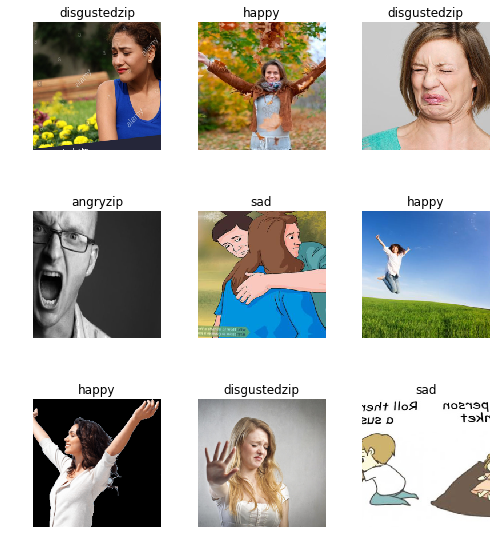

In [15]:
data.show_batch(rows=3, figsize=(7,8))

In [16]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['angryzip', 'disgustedzip', 'happy', 'sad'], 4, 263, 65)

The first thing we do when we approach a problem is to take a look at the data. We _always_ need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data means understanding how the data directories are structured, what the labels are and what some sample images look like.

The main difference between the handling of image classification datasets is the way labels are stored. In this particular dataset, labels are stored in the filenames themselves. We will need to extract them to be able to classify the images into the correct categories. Fortunately, the fastai library has a handy function made exactly for this, `ImageDataBunch.from_name_re` gets the labels from the filenames using a [regular expression](https://docs.python.org/3.6/library/re.html).

In [24]:
# fnames = get_image_files(path_img)
# fnames[:5]

NameError: name 'path_img' is not defined

In [17]:
print(data.classes)
len(data.classes),data.c

['angryzip', 'disgustedzip', 'happy', 'sad']


(4, 4)

## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will dive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 outputs).

We will train for 4 epochs (4 cycles through all our data).

In [18]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [19]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.683617,1.342755,0.661538
2,1.388204,1.071149,0.430769
3,1.136698,1.050982,0.461538
4,0.983966,1.005239,0.430769


In [20]:
learn.save('stage-1')

In [21]:
learn.unfreeze()

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


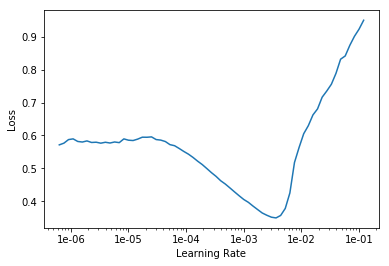

In [31]:
learn.recorder.plot()

In [23]:
lr = 0.0025

In [24]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate
1,0.516991,0.952270,0.369231
2,0.446933,0.989698,0.323077
3,0.366458,1.428914,0.430769
4,0.308851,1.466236,0.369231
5,0.267122,1.350827,0.323077


In [25]:
learn.save('stage-2')

In [ ]:
#learn.model

In [26]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (263 items)
[Category happy, Category happy, Category happy, Category happy, Category happy]...
Path: data/train
x: ImageItemList (263 items)
[Image (3, 281, 500), Image (3, 339, 500), Image (3, 332, 500), Image (3, 300, 450), Image (3, 334, 300)]...
Path: data/train;

Valid: LabelList
y: CategoryList (65 items)
[Category sad, Category angryzip, Category happy, Category sad, Category disgustedzip]...
Path: data/train
x: ImageItemList (65 items)
[Image (3, 466, 500), Image (3, 1667, 2500), Image (3, 278, 500), Image (3, 500, 333), Image (3, 1080, 1920)]...
Path: data/train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
    

In [27]:
interp = ClassificationInterpretation.from_learner(learn)

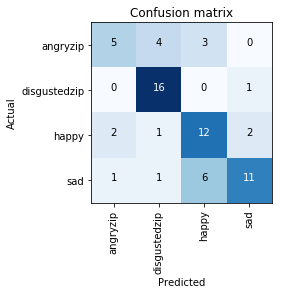

In [28]:
interp.plot_confusion_matrix()

In [29]:
learn.export()

# Cleaning the Data


In [42]:
from fastai.widgets import *


In [43]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Train)

In [44]:
ImageCleaner(ds, idxs, path)

'No images to show :)'

In [45]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)


Getting activations...


Computing similarities...


In [46]:
ImageCleaner(ds, idxs, path, duplicates=True)


'No images to show :). 3 pairs were skipped since at least one of the images was deleted by the user.'

Once you've cleaned the data, remake the DataBunch and retrain!

## Results

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
doc(interp.plot_top_losses)

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1)

In [ ]:
learn.load('stage-1');

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

That's a pretty accurate model!

## Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. It will be explained later in the course and you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here. To help it along, let's us use larger images too, since that way the network can see more detail. We reduce the batch size a bit since otherwise this larger network will require more GPU memory.

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [ ]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(8)

In [ ]:
learn.save('stage-1-50')

It's astonishing that it's possible to recognize pet breeds so accurately! Let's see if full fine-tuning helps:

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

If it doesn't, you can always go back to your previous model.

In [ ]:
learn.load('stage-1-50');

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.most_confused(min_val=2)

## Other data formats

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE); path

In [ ]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

In [ ]:
data.show_batch(rows=3, figsize=(5,5))

In [ ]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)
learn.fit(2)

In [ ]:
df = pd.read_csv(path/'labels.csv')
df.head()

In [ ]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

In [ ]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

In [ ]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

In [ ]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

In [ ]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

In [ ]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

In [ ]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

In [ ]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes